---
# **データサイエンス基礎　第3回課題**
## **【フェルミ推定】日本国内における小学校に必要な教員数の概算**
---
##### 1.　文部科学省の統計より，[昭和30年(1955年)から令和4年(2023年)までの小学生の児童数の推移](https://www.mext.go.jp/content/20230417-mxt_chousa01-000029229-4.xlsx)が公開されている．
##### 2.　また，文部科学省より[小学校の1クラス（学級）当たりの人数](https://www.mext.go.jp/b_menu/activity/detail/2021/20210331.html)は最大で<u> **35人** </u>とすることが決定されている．
##### 3.　1学級につき，必要な教員は<u> **1人** </u>であると仮定する．
##### 　したがって，これらの条件から，その年度に必要な教員数を以下のようにして概算した．
$$ 必要な教員数 = \lceil 児童数÷1学級当たりの児童数 \rceil × 1学級当たりの教員数 $$
$$ \longleftrightarrow 必要な教員数 = \lceil 児童数÷35 \rceil × 1 $$


,年度,教員数,教員数（概算）,絶対誤差 [万人],相対誤差 [%]
0,1955,340572,350485,0.9913,2.910691
1,1960,360660,359734,-0.0926,-0.256752
2,1965,345118,279301,-6.5817,-19.070869
3,1970,367941,271243,-9.6698,-26.280844
4,1975,415071,296139,-11.8932,-28.653411
5,1980,467953,337903,-13.0050,-27.791253
6,1985,461256,317011,-14.4245,-31.272222
7,1990,444218,267809,-17.6409,-39.712258
8,1995,430958,239150,-19.1808,-44.507353
9,2000,407598,210460,-19.7138,-48.365792


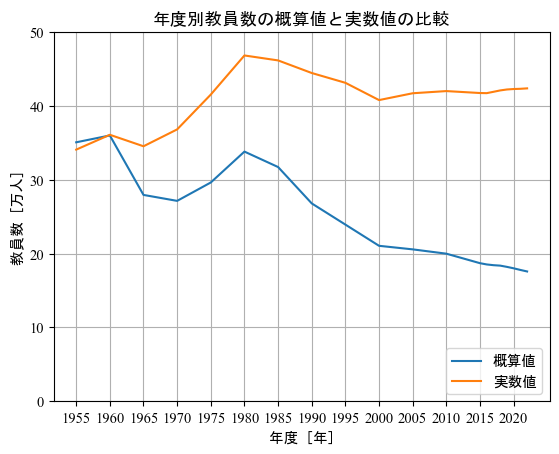

In [34]:
# 基本ライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# CSVファイルをデータフレームにする
df = pd.read_csv('データベース.csv')

# フェルミ推定をする上での仮定
student_per_class = 35      # 1学級当たりの児童数 
teacher_per_class = 1       # 1学級当たりの教員数

table_df = pd.DataFrame()   # 表にするデータを格納するデータフレーム
classes_list = []           # 年度別学級数のリスト
teacher_list = []           # 年度別教員数のリスト
absolute_errors_list = []   # 絶対誤差のリスト
percentage_errors_list = [] # 相対誤差のリスト

# 年度ごとに概算したデータをリストに追加する
for index, row in df.iterrows():
    # 最大35人の学級を仮定して，総児童数に対して，何学級あればよいか計算する
    classes = math.ceil(row['児童数'] / student_per_class)
    classes_list.append(classes)
    # 上式で計算した学級数に対して必要な教員数を計算する
    teacher = classes * teacher_per_class
    teacher_list.append(teacher)

    # 概算した教員数と実際の教員数の絶対誤差と相対誤差を計算する
    absolute_error = (teacher - row['教員数'])
    absolute_errors_list.append(absolute_error/10000)               # [万人]単位とする
    percentage_errors_list.append(absolute_error/row['教員数']*100) # 単位は[%]

# リストをデータフレームに追加
df['クラス数'] = classes_list
df['教員数（概算）'] = teacher_list
table_df['年度'] = df['年度']
table_df['教員数'] = df['教員数']
table_df['教員数（概算）'] = df['教員数（概算）']
table_df['絶対誤差 [万人]'] = absolute_errors_list
table_df['相対誤差 [%]'] = percentage_errors_list

# print(df)
# df.to_csv('データ.csv', mode='w')
display(table_df)

# 教員数の概算値と実数値を比較するグラフの描画
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams['font.size'] = 10.5
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(df['年度'], df['教員数（概算）']/10000, label='概算値')
plt.plot(df['年度'], df['教員数']/10000, label='実数値')
plt.title('年度別教員数の概算値と実数値の比較', fontname="MS Gothic")
plt.xticks(
    ticks=[1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020],
    labels=['1955', '1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020']
)
plt.yticks(
    ticks=[0, 10, 20, 30, 40, 50],
    labels=['0', '10', '20', '30', '40', '50']
)
ax.set_xlabel('年度 [年]', fontname="MS Gothic", )
ax.set_ylabel('教員数 [万人]', fontname="MS Gothic")
plt.grid()
plt.legend(prop={'family': 'MS Gothic', 'size': 'medium'}, loc='lower right')
plt.show()





- グラフが一致しない原因
- 増減が一致している件
- 生徒が減少しているのに教員は増加している件